# Downloading Data and Brief Introduction to Some Vizualizations

In this example, we will get world cup data. From the statsbomb [Competition List](https://github.com/statsbomb/open-data/blob/master/data/competitions.json) we see that the world cup data is given competition_id=43

## Import Packages

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os, sys
# We have to append the parent folder because we are running this from inside notebook
sys.path.append("../")
import pystatsbomb as sb
from pystatsbomb.plotting import plotpitch, plotpitch_bokeh
from pystatsbomb.plotting import pass_rose, getArrow
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import Arrow, OpenHead, Label
from bokeh.io import show, output_notebook
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [3]:
output_notebook()

Loading BokehJS ...

## Start the client

In [4]:
c = sb.Client(local_source_dir=None)
c.get_competitions()
# Check to see what competitions are returned
print([{comp["competition_name"]: comp["competition_id"]}  for comp in c.competitions])

[{"FA Women's Super League": 37}, {'FIFA World Cup': 43}, {'NWSL': 49}]


## Download all the World Cup Data

This will store the data inside the class as:

* df_matches
* df_lineups
* df_events

In [5]:
comp_id = 43  # FIFA World Cup
match_ids = [7585]  # Columbia - England
deep_lineup_parse = True


In [6]:
c.get_all_sb_data(
    comp_id=comp_id,
    match_ids=match_ids,
    deep_lineup_parse=deep_lineup_parse,
    toPandas=True)

Beginning Deep Lineup Parse


In [7]:
df_matches = c.df_matches.set_index('match_id')
df_lineups = c.df_lineups
df_events = c.df_events

# Take a Look at One Match

Group Stage Round 1: England v Columbia

In [8]:
match_id = 7585
match_lineups = df_lineups.loc[df_lineups["match_id"] == match_id]
match_events = df_events.loc[df_events["match_id"] == match_id]

In [9]:
match_lineups.iloc[1:-1:5, :]

,country_id,country_name,jersey_number,match_id,player_id,player_name,team_id,team_name
1,68,England,20,7585,3094,Bamidele Alli,768,England
6,68,England,12,7585,3308,Kieran Trippier,768,England
11,68,England,3,7585,3594,Danny Rose,768,England
16,49,Colombia,23,7585,3494,Davinson Sánchez Mina,769,Colombia
21,49,Colombia,7,7585,5688,Carlos Arturo Bacca Ahumada,769,Colombia
26,49,Colombia,15,7585,6193,Andrés Mateus Uribe Villa,769,Colombia


In [10]:
print("Number of Match Events: {}".format(len(match_events)))

Number of Match Events: 3168


# Load Data From Local Folder

If you have already downloaded the data from statsbomb, point your client to the folder with the files and run the client. This time we will add the tag "deep_lineup_parse" which will add tactical changes, starter data, positions, substitutions, and minutes played to the list of dataframes generated

In [11]:
c = sb.Client(local_source_dir="../../open-data/data")
c.get_competitions()
# Check to see what competitions are returned
print([{comp["competition_name"]: comp["competition_id"]}  for comp in c.competitions])

[{"FA Women's Super League": 37}, {'FIFA World Cup': 43}, {'NWSL': 49}]


In [12]:
comp_id = 43  # FIFA World Cup
match_ids = [7585]  # Columbia - England
deep_lineup_parse = True


In [13]:
c.get_all_sb_data(
    comp_id=comp_id,
    match_ids=match_ids,
    deep_lineup_parse=deep_lineup_parse,
    toPandas=True)

Beginning Deep Lineup Parse


In [14]:
df_deep_lineups = c.df_deep_lineup
df_play_time = c.df_play_time
df_positions = c.df_positions

In [15]:
df_play_time.groupby(["team_name", "player.name", "match_id"], as_index=False)\
    .sum().sort_values("total_minutes_played", ascending=False).iloc[1:-1:5, :]

,team_name,player.name,match_id,game_minutes_played,seconds_played,total_minutes_played
4,Colombia,David Ospina Ramírez,7585,121.0,8019.653,133.660883
11,Colombia,Radamel Falcao García Zárate,7585,121.0,8019.653,133.660883
19,England,Harry Kane,7585,121.0,8019.600,133.660000
15,England,Ashley Young,7585,101.0,6755.213,112.586883
2,Colombia,Carlos Arturo Bacca Ahumada,7585,60.0,4061.333,67.688883
10,Colombia,Luis Fernando Muriel Fruto,7585,34.0,2464.653,41.077550


## Brief Look at Passes

In [16]:
df_matches = c.df_matches.set_index('match_id')
df_lineups = c.df_lineups
df_events = c.df_events

In [17]:
pass_values = [
    'index', 'duration', 'id', 'period','minute','second', 'player_name',
    'position_name',
    'possession_team_name', 'possession', 'possession_team_id',
    'related_events', 'under_pressure', 'location', 
    # Pass details
    'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_backheel', 
    'pass_body_part_id', 'pass_body_part_name', 'pass_cross', 'pass_deflected', 
    'pass_end_location', 'pass_goal_assist', 'pass_height_id', 'pass_height_name', 
    'pass_length', 'pass_outcome_id', 'pass_outcome_name', 'pass_recipient_id', 
    'pass_recipient_name', 'pass_shot_assist', 'pass_switch', 'pass_through_ball',
    'pass_type_id', 'pass_type_name']

In [18]:
df_passes = df_events.loc[df_events['type_name'].isin(['Pass']), pass_values].set_index("index")
df_passes['pass_outcome_name'].fillna('Complete', inplace=True)

C:\Program Files\Anaconda3\envs\statsbomb\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [19]:
df_passes.shape

(1161, 35)

In [20]:
pd.crosstab(df_passes["possession_team_name"], df_passes['pass_outcome_name']).sort_values("Complete", ascending=False).head()

pass_outcome_name,Complete,Incomplete,Out,Pass Offside,Unknown
possession_team_name,,,,,
England,483,94,14,2,5
Colombia,423,121,14,1,4


### Pass Angle

In [21]:
def pass_direction(x):
    """According to statsbomb, pass_angle is between 0 (pass ahead) and pi (pass behind). Clockwise
    We divide the circle into 4 equal sections. Directions are forward, right, left, behind"""
    
    pi_div = np.pi / 4
    if (x <= pi_div) & (x >= -pi_div):
        return "Forward"
    elif (x > pi_div) & (x <= 3 * pi_div):
        return "Right"
    elif (x > 3 * pi_div) & (x < -3 * pi_div):
        return "Behind"
    else:
        return "Left"
    
def pass_angle_deg(x):
    """Convert negative angles to positive radians from 0 to 2pi clockwise"""
    if x >= 0:
        return x * 180. / np.pi
    else:
        return (2 * np.pi + x) * 180. / np.pi

In [22]:
df_passes['pass_direction'] = df_passes['pass_angle'].apply(pass_direction)
df_passes['pass_angle_deg'] = df_passes['pass_angle'].apply(pass_angle_deg)

C:\Program Files\Anaconda3\envs\statsbomb\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


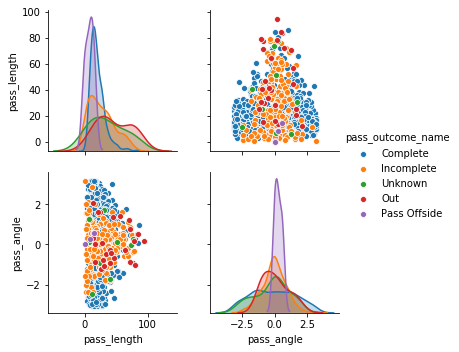

In [23]:
sns.pairplot(df_passes[['pass_length', 'pass_angle', 'pass_outcome_name']], hue='pass_outcome_name')

# Pass Rose Plot
This is the chart of pass length and frequency for all passes in the dataset

1161 total observations
24
24


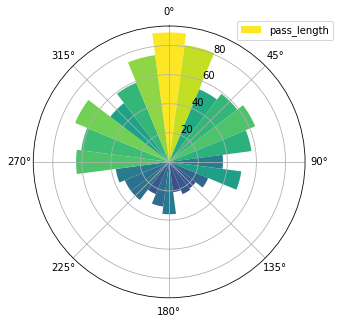

In [24]:
pass_rose(df_passes)

# Base Map

(<Figure size 504x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2204c3641d0>)

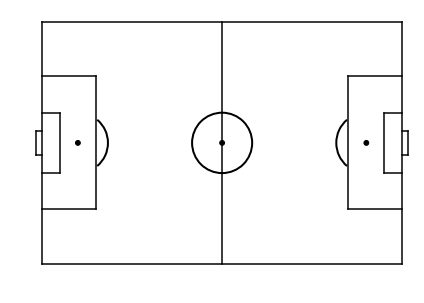

In [25]:
plotpitch()

In [26]:
plotpitch_bokeh(display=True)

# Possession

In [27]:
def getPossession(df):
    df_pos = df.loc[:, ("possession_team_name", "possession", "period", "minute", "second")]
    df_pos["time"] = 60 * df_pos["minute"] + df_pos["second"]
    df_pos = df_pos.loc[df_pos["time"] > 0 ]
    df_pos_grp = df_pos.groupby(["possession_team_name", "possession"]).agg(
        {"time": ["min", "max"]})
    df_pos_grp["time_of_pos"] = df_pos_grp["time"]["max"] - df_pos_grp["time"]["min"]
    df_pos_grp = df_pos_grp.groupby("possession_team_name").sum() / 60
    del df_pos_grp["time"]
    
    return df_pos_grp

In [28]:
getPossession(df_events)

,time_of_pos
,
possession_team_name,
Colombia,39.533333
England,51.500000


# Shots

In [29]:
shot_values = [
    'index', 'duration', 'id', 'period','minute','second', 'player_name',
    'position_name', 'possession_team_name', 'possession', 'possession_team_id',
    'related_events', 'under_pressure', 'location', 
    # Shot details
    'shot_body_part_id', 'shot_body_part_name', 'shot_end_location',
    'shot_first_time', 'shot_follows_dribble', 'shot_freeze_frame',
    'shot_key_pass_id', 'shot_outcome_id', 'shot_outcome_name', 
    'shot_statsbomb_xg', 'shot_technique_id', 'shot_technique_name',
    'shot_type_id', 'shot_type_name',
]

df_shots = df_events.loc[df_events['type_name'].isin(['Shot']), shot_values]

In [30]:
df_shots['shot_outcome_name'].value_counts()

Off T      15
Goal        9
Blocked     8
Saved       6
Wayward     2
Post        1
Name: shot_outcome_name, dtype: int64

### First 10 shots in matplotlib

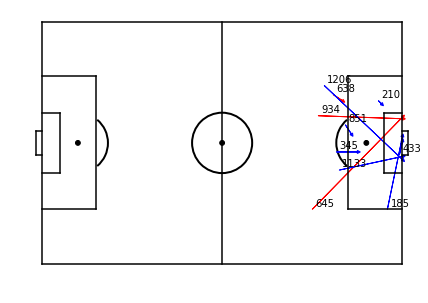

In [31]:
fig, ax = plotpitch(display=False)
for line in df_shots[['location', 'shot_end_location', 'possession_team_name']].head(10).iterrows():
    x,y,dx,dy,c = getArrow(line[1][0], line[1][1], line[1][2], 'England', viz="mpl")
    ax.arrow(x, y, dx, dy, head_width=1, head_length=1, fc=c, ec=c)
    ax.annotate(line[0], xy=(x, y), xytext=(x+1, y+1))
plt.show()

### First 10 shots in bokeh

In [32]:
plot = plotpitch_bokeh(display=False)
for line in df_shots[['location', 'shot_end_location', 'possession_team_name']].head(10).iterrows():
    x,y,dx,dy,c = getArrow(line[1][0], line[1][1][0:2], line[1][2], 'England', viz="bokeh")
    plot.add_layout(Arrow(end=OpenHead(size=10, line_color=c), 
                          line_color=c,
                          x_start=x, y_start=y, x_end=dx, y_end=dy))
    plot.add_layout(Label(x=x, y=y, text_font_size="10pt", text=str(line[0])))
show(plot)